<h1 style="text-align:center;">TF2202 Komputasi Rekayasa - Persamaan Diferensial Parsial</h1>
<h2 style="text-align:center;">Persamaan Difusi</h2>
<h3 style="text-align:center;">Fadjar Fathurrahman</h3>

# Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

In [6]:
import matplotlib
matplotlib.style.use("default")

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [8]:
import matplotlib.animation as animation

In [9]:
import IPython.display

### Fungsi untuk animasi 2d (silakan modifikasi sesuai kebutuhan)

In [10]:
def create_anim_2d(y, x, t, ymin, ymax):
    plt.clf()
    fig, ax = plt.subplots()
    plt.ylim(ymin, ymax)
    k = 0
    line, = ax.plot(x, y[:,k])

    time_template = "t = %.5f"
    time_text = ax.text(0.8, 0.9, "", transform=ax.transAxes)

    def init():
        line.set_xdata(x)
        line.set_ydata(y[:,0])
        time_text.set_text(time_template % t[0])
        return line, time_text

    def animate(k):
        line.set_xdata(x)
        line.set_ydata(y[:,k])
        time_text.set_text(time_template % t[k])
        return line, time_text

    anim = animation.FuncAnimation(fig, animate, init_func=init, interval=len(t), blit=True,
                                   frames=len(t));
    return anim

### Fungsi untuk animasi 3d surface plot (silakan modifikasi sesuai kebutuhan)

In [11]:
def create_anim_surf3d(Z, X, Y, t, zmin, zmax):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    
    def gen_surf_data(k, Z, line):
        ax.clear()
        line = ax.plot_surface(X, Y, Z[:,:,k], linewidth=2, cmap="jet", antialiased=False)
        ax.set_zlim(zmin, zmax)
        ax.set_title("t="+format("%.4f"%t[k]))
        return line,
    
    line = ax.plot_surface(X, Y, Z[:,:,0], linewidth=2, cmap="jet", antialiased=False)
    ax.set_title("t="+format("%.4f"%t[0]))
    
    anim = animation.FuncAnimation(fig, gen_surf_data, fargs=(Z, line),
                                   interval=len(t), frames=len(t), blit=False)
    
    return anim

# Persamaan Kalor 1d

Dalam satu dimensi spasial (misalkan x).

$$
\alpha \frac{\partial^{2}}{\partial x^2} u(x,t) = \frac{\partial}{\partial t} u(x,t)
$$

Domain:
- spasial: $0 \leq x \leq x_{f}$
- temporal: $0 \leq t \leq t_{f}$.

Syarat batas:
- $u(0,t) = b_{0}(t)$
- $u(x_{f},t) = b_{x_f}(t)$

Syarat awal:
- $u(x,0) = u_{0}(x)$ 

Catatan: persamaan yang sama juga digunakan untuk menjelaskan fenomena difusi.

## Metode Euler Eksplisit

Domain spasial dibagi menjadi $N_{x}$ segmen dengan $\Delta x = x_{f}/N_{x}$.

Domain temporal dibagi menjadi $N_{t}$ segmen dengan $\Delta t = t_{f}/N_{t}$.

Turunan parsial kedua terhadap $x$ diaproksimasi dengan menggunakan central difference.

Turunan parsial pertama terhadap $t$ diaproksimasi dengan forward difference.

Dengan menggunakan notasi berikut:
- $u(x,t) = u^{k}_{i}$
- $u(x+\Delta x,t) = u^{k}_{i+1}$
- $u(x-\Delta x,t) = u^{k}_{i-1}$
- $u(x,t+\Delta t) = u^{k+1}_{i}$
- $u(x,t-\Delta t) = u^{k-1}_{i}$

dapat dituliskan:

$$
\alpha \frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2} =
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t}
$$

Dengan menggunakan defisi:

$$
r = \alpha \frac{\Delta t}{(\Delta x)^2}
$$

Persamaan ini dapat dipecahkan untuk mendapatkan $u^{k+1}_{i}$

$$
u^{k+1}_{i} = r \left( u^{k}_{i+1} + u^{k}_{i-1} \right) + (1 - 2r) u^{k}_{i} 
$$

untuk $i = 1, 2, \ldots, N_{x}-1$.

Dapat ditunjukkan bahwa skema ini akan stabil jika:

$$
r = \alpha \frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{2}
$$

### Implementasi

In [12]:
def heat_1d_euler_exp( alpha, xf, tf, u0x, bx0, bxf, Nx, Nt ):

    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)

    u = np.zeros( (Nx+1, Nt+1) )

    # Aplikasi syarat awal
    for i in range(Nx+1):
        u[i,0] = u0x( x[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    r = alpha*dt/dx**2
    
    if r > 0.5:
        print("heat_1d_euler_exp:")
        print("WARNING: r lebih besar dari 0.5: %f\n" % r)
        print("WARNING: solusi tidak stabil !!")
    else:
        print("heat_1d_euler_exp:")
        print("r = %f >= 0.5\n" % r)
        print("Solusi seharusnya stabil")

    for k in range(0,Nt):
        for i in range(1,Nx):
            u[i,k+1] = r*( u[i+1,k] + u[i-1,k] ) + (1 - 2*r)*u[i,k]
    
    return u, x, t

### Contoh

Cari solusi numerik persamaan kalor:
$$
\frac{\partial^{2}}{\partial x^2} u(x,t) = \frac{\partial}{\partial t} u(x,t)
$$

pada domain:
- spasial: $0 \leq x \leq 1$
- temporal: $0 \leq t \leq 0.1$.

Syarat batas:
- $u(0,t) = 0$
- $u(1,t) = 0$

Syarat awal:
- $u(x,0) = \sin(\pi x)$ 

Bandingkan dengan solusi analitik:
$$
u(x,t) = \sin(\pi x) \exp(-\pi^2 t)
$$

In [13]:
# Syarat awal
def initial_temp( x ):
    return np.sin(np.pi*x)
# Syarat batas kiri
def bx0( t ):
    return 0.0
# Syarat batas kanan
def bxf( t ):
    return 0.0

In [14]:
def sol_01_analitik(x,t):
    return np.sin(np.pi*x)*np.exp(-np.pi**2 * t)

#### Kasus solusi stabil

In [15]:
# Dari soal atau masalah yang diberikan
alpha = 1.0
xf = 1.0
tf = 0.1

# ditentukan pengguna
Nx = 25
Nt = 200

u_exp, x_exp, t_exp = heat_1d_euler_exp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

heat_1d_euler_exp:
r = 0.312500 >= 0.5

Solusi seharusnya stabil


Plot hasilnya untuk beberapa nilai t.

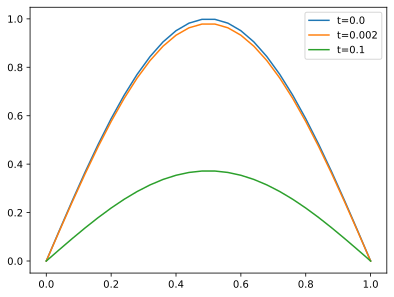

In [16]:
plt.clf()
plt.plot(x_exp, u_exp[:,0], label="t="+str(t_exp[0]))
plt.plot(x_exp, u_exp[:,4], label="t="+str(t_exp[4]))
plt.plot(x_exp, u_exp[:,-1], label="t="+str(t_exp[-1]))
plt.legend();

Perbandingan dengan solusi analitik.

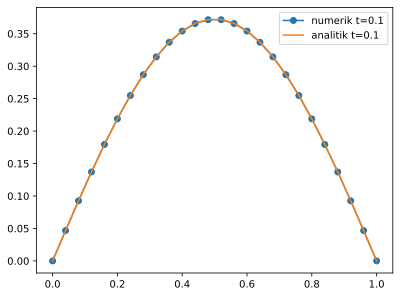

In [17]:
plt.clf()
plt.plot(x_exp, u_exp[:,-1], label="numerik t="+str(t_exp[-1]), marker="o")
plt.plot(x_exp, sol_01_analitik(x_exp, t_exp[-1]), label="analitik t="+str(t_exp[-1]))
plt.legend();

Animasi

<Figure size 640x480 with 0 Axes>

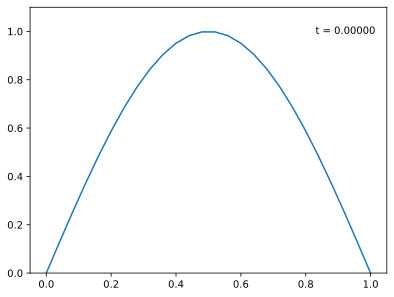

In [18]:
anim = create_anim_2d(u_exp, x_exp, t_exp, 0.0, 1.1)

In [19]:
IPython.display.HTML( anim.to_html5_video() )

Tulis ke file:

In [ ]:
for k in range(Nt+1):
    plt.clf()
    plt.plot( x_exp, u_exp[:,k], label="t="+format("%.5f" % t_exp[k]))
    plt.legend();
    plt.ylim(0.0, 1.05)
    plt.savefig(format("TEMP_%04d.png" % (k)))

#### Kasus solusi tidak stabil

In [20]:
# Dari soal atau masalah yang diberikan
alpha = 1.0
xf = 1.0
tf = 0.1

# ditentukan pengguna
Nx = 50
Nt = 200

u_exp, x_exp, t_exp = heat_1d_euler_exp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

heat_1d_euler_exp:



Plot untuk beberapa nilai t (paling awal dan paling akhir) 

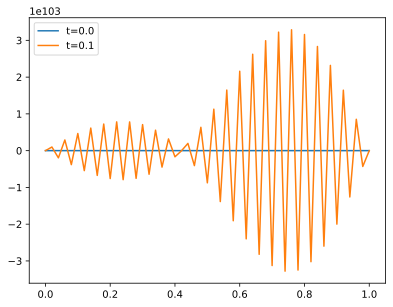

In [21]:
plt.clf()
plt.plot( x_exp, u_exp[:,0], label="t="+str(t_exp[0]))
plt.plot( x_exp, u_exp[:,-1], label="t="+str(t_exp[-1]))
plt.legend();

Perhatikan bahwa pada kasus ini solusi numerik yang diperoleh tidak stabil (kesalahan semakin membesar).

## Metode Euler implisit

Domain spasial dibagi menjadi $N_{x}$ segmen dengan $\Delta x = x_{f}/N_{x}$.

Domain temporal dibagi menjadi $N_{t}$ segmen dengan $\Delta t = t_{f}/N_{t}$.

Turunan parsial kedua terhadap $x$ diaproksimasi dengan menggunakan central difference.

Turunan parsial pertama terhadap $t$ diaproksimasi dengan backward difference.

$$
\alpha \frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2} = \frac{u^{k}_{i} - u^{k-1}_{i}}{\Delta t}
$$

Dengan menggunakan notasi:
$$
r = \alpha \frac{\Delta t}{(\Delta x)^2}
$$

Diperoleh persamaan implisit:
$$
-ru^{k}_{i-1}+ (1 + 2r)u^{k}_{i} - ru^{k}_{i+1} = u^{k-1}_{i}
$$
untuk $i = 1, 2, \ldots, N_{x}-1$.

Dalam bentuk matriks:

$$
\begin{bmatrix}
1 + 2r & -r & 0 & \cdot & 0 & 0 \\
-r & 1 + 2r & -r & \cdot & 0 & 0 \\
0 & -r & 1 + 2r & \cdot & 0 & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & 0 & 0 & \cdot & 1 + 2r & -r \\
0 & 0 & 0 & \cdot & -r & 1 + 2r
\end{bmatrix}
\begin{bmatrix}
u^{k}_{1} \\
u^{k}_{2} \\
u^{k}_{3} \\
\cdot \\
u^{k}_{N_{x}-2} \\
u^{k}_{N_{x}-1}
\end{bmatrix} = 
\begin{bmatrix}
u^{k-1}_{1} + ru^{k}_{0} \\
u^{k-1}_{2} \\
u^{k-1}_{3} \\
\cdot \\
u^{k-1}_{N_{x}-2} \\
u^{k-1}_{N_{x}-1} + ru^{k}_{N_{x}}
\end{bmatrix}
$$

### Implementasi

Dalam kode di bawah ini akan didefinisikan matriks $\mathbf{A}$ sebagai matriks koefisien pada ruas kiri dan vektor $\mathbf{b}$ pada ruas kanan.

In [ ]:
def heat_1d_euler_imp( alpha, xf, tf, u0x, bx0, bxf, Nx, Nt ):
    
    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)

    u = np.zeros( (Nx+1, Nt+1) ) 

    # Aplikasi syarat awal
    for i in range(Nx+1):
        u[i,0] = u0x( x[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    r = alpha*dt/dx**2
    
    # Bangun matriks A
    A = np.zeros( (Nx-1,Nx-1) )
    for i in range(Nx-1):
        A[i,i] = 1 + 2*r
        if i > 0:
            A[i-1,i] = -r
            A[i,i-1] = -r
    
    # Bangun vektor b
    b = np.zeros(Nx-1)
    for k in range(1,Nt+1):
        b = np.copy(u[1:Nx,k-1])
        b[0] = b[0] + r*u[0,k]
        b[Nx-2] = b[Nx-2] + r*u[Nx,k]
        # Selesaikan sistem persamaan linear
        u[1:Nx,k] = np.linalg.solve(A, b)
    
    return u, x, t

### Contoh

Untuk parameter-parameter berikut, metode eksplisit stabil.

In [ ]:
alpha = 1.0

# dari soal (deskripsi masalah)
xf = 1.0
tf = 0.1

# dari pengguna
Nx = 25
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

Plot hasilnya untuk beberapa nilai t.

In [ ]:
plt.clf()
plt.plot(x_imp, u_imp[:,0], label="t="+str(t_imp[0]))
plt.plot(x_imp, u_imp[:,4], label="t="+str(t_imp[4]))
plt.plot(x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]))
plt.legend();

Untuk parameter-parameter berikut ini, metode eksplisit tidak stabil.

Bagaimana untuk metode implisit?

In [ ]:
alpha = 1.0

xf = 1.0
tf = 0.1

Nx = 50
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

Plot hasilnya untuk beberapa nilai t.

In [ ]:
plt.clf()
plt.plot(x_imp, u_imp[:,0], label="t="+str(t_imp[0]))
plt.plot(x_imp, u_imp[:,4], label="t="+str(t_exp[4]))
plt.plot(x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]))
plt.legend();

Dapat dilihat bahwa solusi numerik yang dihasikan oleh metode implisit bersifat stabil. Dapat ditunjukkan dengan menggunakan analisis numerik bahwa metode implisit bersifat stabil tanpa syarat.

Sekarang akan kita coba mencari solusi untuk nilai $t_f$ yang lebih besar.

In [ ]:
alpha = 1.0

xf = 1.0
tf = 0.2

Nx = 50
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

Plot hasilnya untuk beberapa nilai t.

In [ ]:
plt.clf()
plt.plot(x_imp, u_imp[:,0], label="t="+str(t_imp[0]))
plt.plot(x_imp, u_imp[:,100], label="t="+str(t_imp[100]))
plt.plot(x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]))
plt.legend();

In [ ]:
anim = create_anim_2d(u_imp, x_imp, t_imp, 0.0, 1.1)

In [ ]:
IPython.display.HTML(anim.to_html5_video())

Bagaimana jika kita menggunakan metode eksplisit ?

In [ ]:
alpha = 1.0

xf = 1.0
tf = 0.2

Nx = 50
Nt = 200

u_exp, x_exp, t_exp = heat_1d_euler_exp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

In [ ]:
plt.clf()
plt.plot(x_exp, u_exp[:,0], label="t="+str(t_exp[0]))
plt.plot(x_exp, u_exp[:,10], label="t="+str(t_exp[10]))
plt.plot(x_exp, u_exp[:,15], label="t="+str(t_exp[15]))
plt.plot(x_exp, u_exp[:,16], label="t="+str(t_exp[16]))
plt.ylim(0.0, 1.0)
plt.legend();

Dapat dilihat bahwa solusi ini tidak stabil.

In [ ]:
anim = create_anim_2d(u_exp, x_exp, t_exp, 0.0, 1.1)

In [ ]:
IPython.display.HTML(anim.to_html5_video())

## Metode Crank-Nicholson

Metode Crank-Nicholson diperoleh dengan menggunakan rata-rata aproksimasi central difference antara titik waktu $k + 1$ dan $k$ sehingga diperoleh:

$$
\frac{\alpha}{2} \left(
\frac{u^{k+1}_{i+1} - 2u^{k+1}_{i} + u^{k+1}_{i-1}}{(\Delta x)^2} +
\frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2}
\right) = 
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t}
$$

atau:
$$
ru^{k+1}_{i+1} - 2ru^{k+1}_{i} + ru^{k+1}_{i-1} + ru^{k}_{i+1} - 2ru^{k}_{i} + ru^{k}_{i-1} = 2u^{k+1}_{i} - 2u^{k}_{i}
$$

$$
-ru^{k+1}_{i+1} + 2(1 + r)u^{k+1}_{i} - ru^{k+1}_{i-1} = ru^{k}_{i+1} + 2(1 - r)u^{k}_{i} + ru^{k}_{i-1}
$$

Dalam bentuk matriks:
$$
\mathbf{A}\mathbf{u}^{k+1} = \mathbf{B}\mathbf{u}^{k}
$$

dengan matriks sebagai berikut.

$$
\mathbf{A} = 
\begin{bmatrix}
2(1 + r) & -r & 0 & \cdot & 0 & 0 \\
-r & 2(1 + r) & -r & \cdot & 0 & 0 \\
0 & -r & 2(1 + r) & \cdot & 0 & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & 0 & 0 & \cdot & 2(1 + r) & -r \\
0 & 0 & 0 & \cdot & -r & 2(1 + r)
\end{bmatrix}
$$

$$
\mathbf{B} = 
\begin{bmatrix}
2(1 - r) & r & 0 & \cdot & 0 & 0 \\
r & 2(1 - r) & r & \cdot & 0 & 0 \\
0 & r & 2(1 - r) & \cdot & 0 & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & 0 & 0 & \cdot & 2(1 - r) & r \\
0 & 0 & 0 & \cdot & r & 2(1 - r)
\end{bmatrix}
$$

$$
\mathbf{u}^{k} =
\begin{bmatrix}
u^{k}_{1} \\
u^{k}_{2} \\
u^{k}_{3} \\
\cdot \\
u^{k}_{M-1} \\
u^{k}_{M}
\end{bmatrix}
$$


### Implementasi

In [ ]:
def heat_1d_CN( alpha, xf, tf, u0x, bx0, bxf, Nx, Nt ):
    
    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)

    u = np.zeros( (Nx+1, Nt+1) ) 

    # Aplikasi syarat awal
    for i in range(Nx+1):
        u[i,0] = u0x( x[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    r = alpha*dt/dx**2
    
    A = np.zeros( (Nx-1,Nx-1) )
    for i in range(Nx-1):
        A[i,i] = 2*(1 + r)
        if i > 0:
            A[i-1,i] = -r
            A[i,i-1] = -r

    B = np.zeros( (Nx-1,Nx-1) )
    for i in range(Nx-1):
        B[i,i] = 2*(1 - r)
        if i > 0:
            B[i-1,i] = r
            B[i,i-1] = r
    
    for k in range(1,Nt+1):
        b = np.matmul(B, u[1:Nx,k-1] )
        u[1:Nx,k] = np.linalg.solve(A, b)
    
    return u, x, t

### Contoh

In [ ]:
alpha = 1.0

xf = 1.0
tf = 0.2

Nx = 50
Nt = 200

u_CN, x_CN, t_CN = heat_1d_CN( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

In [ ]:
plt.clf()
plt.plot(x_CN, u_CN[:,0], label="t="+str(t_CN[0]))
plt.plot(x_CN, u_CN[:,4], label="t="+str(t_CN[4]))
plt.plot(x_CN, u_CN[:,10], label="t="+str(t_CN[10]))
plt.plot(x_CN, u_CN[:,50], label="t="+str(t_CN[50]))
plt.plot(x_CN, u_CN[:,-1], label="t="+str(t_CN[-1]))
plt.legend();

Perbandingan antara metode implisit dan Crank-Nicholson pada waktu terakhir simulasi $t_f$.

In [ ]:
plt.clf()
plt.plot(x_imp, u_imp[:,-1], label="imp t="+str(t_imp[-1]))
plt.plot(x_CN, u_CN[:,-1], label="CN t="+str(t_CN[-1]))
plt.legend();

Perbandingan antara solusi numerik dengan Crank-Nicholson dengan solusi analitik.

In [ ]:
plt.clf()
plt.plot(x_CN, u_CN[:,-1], label="numerik t="+str(t_CN[-1]), marker="o")
plt.plot(x_CN, sol_01_analitik(x_CN, t_CN[-1]), label="analitik t="+str(t_CN[-1]))
plt.legend();

## Latihan 1

Mirip dengan soal sebelumnya, hanya saja dengan syarat awal:

$$
u(x,0) = e^{-50(x-0.5)^2}
$$

Kita akan gunakan metode implisit untuk mencari solusi numeriknya.

In [ ]:
# Syarat awal
def initial_temp( x ):
    return np.exp( -50*(x-0.5)**2 )

# Syarat batas kiri
def bx0( t ):
    return 0.0

# Syarat batas kanan
def bxf( t ):
    return 0.0

alpha = 1.0

xf = 1.0
Nx = 50

tf = 0.1
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

In [ ]:
plt.clf()
plt.plot( x_imp, u_imp[:,0], label="t="+str(t_imp[0]) )
plt.plot( x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]) )
plt.legend()

In [ ]:
anim = create_anim_2d( u_imp, x_imp, t_imp, 0.0, 1.1);

In [ ]:
IPython.display.HTML( anim.to_html5_video() )

## Latihan 2

In [ ]:
# Syarat awal
def initial_temp( x ):
    if x > 0.4 and x < 0.6:
        return 1.0
    else:
        return 0.0

# Syarat batas kiri
def bx0( t ):
    return 0.0

# Syarat batas kanan
def bxf( t ):
    return 0.0

alpha = 1.0

xf = 1.0
Nx = 50

tf = 0.1
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

In [ ]:
plt.clf()
plt.plot( x_imp, u_imp[:,0], label="t="+str(t_imp[0]) )
plt.plot( x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]) )
plt.legend()

In [ ]:
anim = create_anim_2d( u_imp, x_imp, t_imp, 0.0, 1.1 );

In [ ]:
IPython.display.HTML( anim.to_html5_video() )

# Persamaan Kalor 2d

$$
\alpha \left( \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} \right) u(x,y,t)
= \frac{\partial}{\partial t} u(x,y,t)
$$

$$
\alpha \left(
\frac{u^{k}_{i,j+1} - 2u^{k}_{i,j} + u^{k}_{i-1,j}}{(\Delta x)^2} +
\frac{u^{k}_{i,j+1} - 2u^{k}_{i,j} + u^{k}_{i,j-1}}{(\Delta y)^2}
\right) = 
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t}
$$

ADI = alternating direction implicit